# Customer Segmentation using Clustering (K-Means)

**Internship:** TechNest Intern  
**Domain:** Data Analytics  
**Dataset Used:** Mall Customer Segmentation Data (Mall_Customers.csv)  
**Completed by:** Ayushi Karn  

_In this project, we segmented mall customers into different groups based on their annual income and spending behavior using K-Means clustering, and suggested simple strategies for each segment._



In [31]:
# Here we are importing the libraries we'll use through the project.
import pandas as pd
import numpy as np

# For simple, clean visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# For scaling and clustering (we'll use these a bit later)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Tiny cosmetic tweaks so plots look clean but not over-styled
plt.rcParams["figure.figsize"] = (6, 4)
plt.rcParams["axes.grid"] = True

print("Libraries imported successfully ✅")


Libraries imported successfully ✅


In [32]:
# Here we are hiding unnecessary warnings so the notebook looks clean.
import warnings
warnings.filterwarnings("ignore")


In [33]:
# Here we are loading the CSV directly since our notebook is already inside the Data folder
csv_path = "Mall_Customers.csv"
df = pd.read_csv(csv_path)

# Quick peek at the first 5 rows
df.head()



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [34]:
# Here we are quickly checking the basic structure of the data.
print("Shape (rows, columns):", df.shape)
print("\nColumn names:", list(df.columns))

print("\nInfo:")
print(df.info())


Shape (rows, columns): (200, 5)

Column names: ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [35]:
# Here we are getting quick stats for numeric columns only.
display(df.describe().T)

# Here we are checking for missing values and duplicate rows.
print("\nMissing values per column:\n", df.isna().sum())
print("\nNumber of duplicate rows:", df.duplicated().sum())



,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0



Missing values per column:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Number of duplicate rows: 0


In [36]:
# Here we are keeping an untouched copy for safety.
df_raw = df.copy()

# Here we are simplifying column names for easier typing later.
# Example: "Annual Income (k$)" -> "annual_income_k"
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(' ', '_')
      .str.replace(r'[()$-]', '', regex=True)
)

print("Cleaned column names:", list(df.columns))
df.head()


Cleaned column names: ['customerid', 'gender', 'age', 'annual_income_k', 'spending_score_1100']


,customerid,gender,age,annual_income_k,spending_score_1100
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


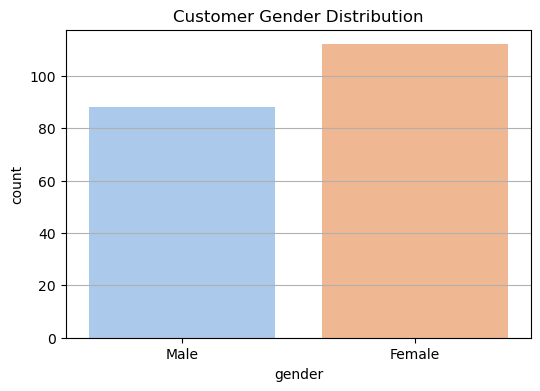

In [37]:
# Here we are checking how many male vs female customers are in the dataset.
sns.countplot(data=df, x="gender", palette="pastel")
plt.title("Customer Gender Distribution")
plt.show()


**Insight:**  
The dataset has almost equal numbers of male and female customers, with a slight majority of female customers. This shows the gender balance is almost well maintained.


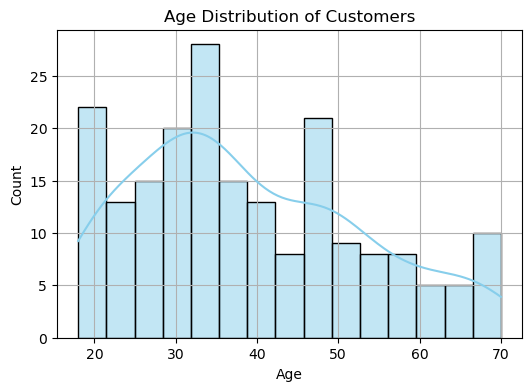

In [55]:
# Here we are plotting the distribution of ages.
sns.histplot(df["age"], bins=15, kde=True, color="skyblue")
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


**Insight:**  
Most customers are between 20 and 40 years old. This suggests that the mall is more popular among young adults.


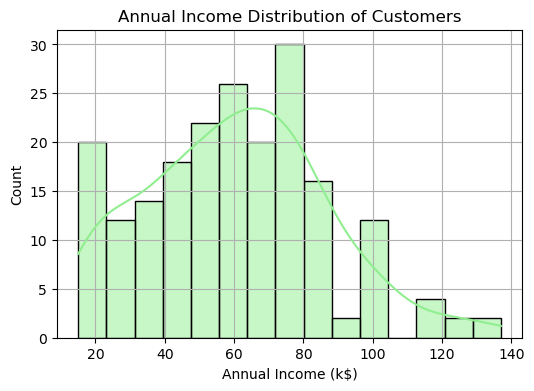

In [54]:
# Here we are plotting the distribution of annual income.
sns.histplot(df["annual_income_k"], bins=15, kde=True, color="lightgreen")
plt.title("Annual Income Distribution of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Count")
plt.show()
                                                                                                                                                                                           

**Insight:**  
The majority of customers have an annual income between 30k and 80k. There are fewer customers at the very high or very low income ranges.


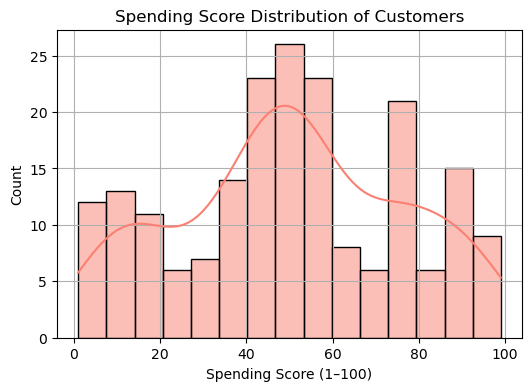

In [56]:
# Here we are plotting the distribution of spending score.
sns.histplot(df["spending_score_1100"], bins=15, kde=True, color="salmon")
plt.title("Spending Score Distribution of Customers")
plt.xlabel("Spending Score (1–100)")
plt.ylabel("Count")
plt.show()


**Insight:**  
Spending scores are spread fairly evenly across low, medium, and high ranges. This indicates a variety of customer spending behaviors.


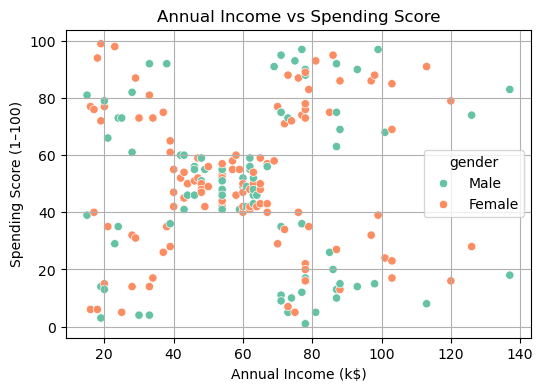

In [57]:
# Here we are plotting Annual Income vs Spending Score
sns.scatterplot(data=df, x="annual_income_k", y="spending_score_1100", hue="gender", palette="Set2")
plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1–100)")
plt.show()


**Insight:**  
Customers form clear groups — some have high income but low spending, others have low income but high spending, and a few have both high income and high spending. This shows the potential for segmentation.


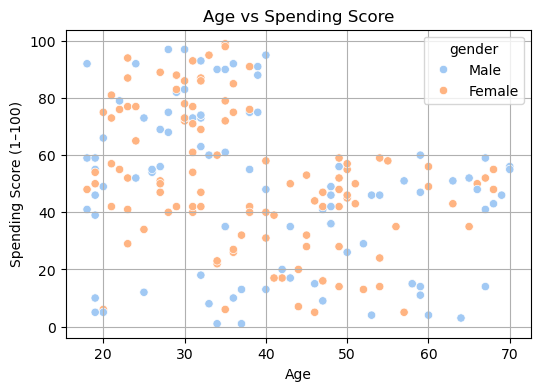

In [58]:
# Here we are plotting Age vs Spending Score
sns.scatterplot(data=df, x="age", y="spending_score_1100", hue="gender", palette="pastel")
plt.title("Age vs Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score (1–100)")
plt.show()


**Insight:**  
Younger customers (20–40 years) are spread across all spending levels, while older customers (50+) mostly fall into moderate or lower spending categories.


In [59]:
# Here we are selecting the features we want for clustering.
X = df[["annual_income_k", "spending_score_1100"]]

# Quick check of the first 5 rows
X.head()


,annual_income_k,spending_score_1100
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [60]:
# Here we are scaling the features so that income and spending score are comparable.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easier handling
X_scaled = pd.DataFrame(X_scaled, columns=["annual_income_scaled", "spending_score_scaled"])
X_scaled.head()


,annual_income_scaled,spending_score_scaled
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


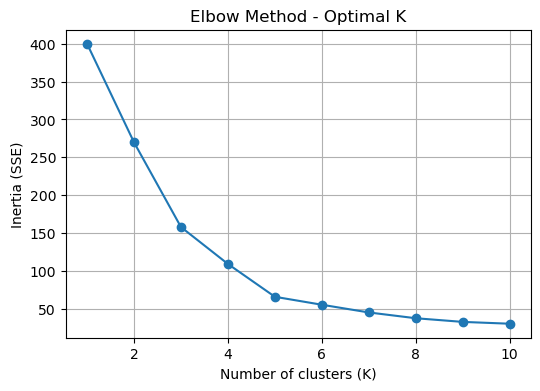

In [61]:
# Here we are running KMeans for K=1 to 10 and storing the inertia (SSE).
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.plot(range(1, 11), inertia, marker="o")
plt.title("Elbow Method - Optimal K")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia (SSE)")
plt.show()


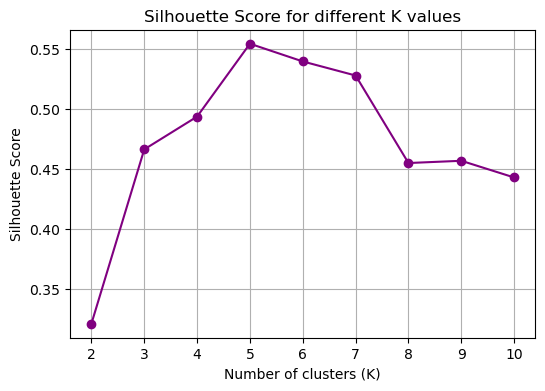

In [62]:
# Here we are checking Silhouette Scores for K=2 to 10
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting Silhouette Scores
plt.plot(range(2, 11), silhouette_scores, marker="o", color="purple")
plt.title("Silhouette Score for different K values")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()


In [63]:
# Here we are building the final KMeans model with K=5
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Getting the cluster labels for each customer
df["cluster"] = kmeans.labels_

# Quick check: first 10 rows with their assigned cluster
df.head(10)


,customerid,gender,age,annual_income_k,spending_score_1100,cluster,segment_name
0,1,Male,19,15,39,4,"Average (Medium income, Medium spending)"
1,2,Male,21,15,81,2,"Young Spenders (Low income, High spending)"
2,3,Female,20,16,6,4,"Average (Medium income, Medium spending)"
3,4,Female,23,16,77,2,"Young Spenders (Low income, High spending)"
4,5,Female,31,17,40,4,"Average (Medium income, Medium spending)"
5,6,Female,22,17,76,2,"Young Spenders (Low income, High spending)"
6,7,Female,35,18,6,4,"Average (Medium income, Medium spending)"
7,8,Female,23,18,94,2,"Young Spenders (Low income, High spending)"
8,9,Male,64,19,3,4,"Average (Medium income, Medium spending)"
9,10,Female,30,19,72,2,"Young Spenders (Low income, High spending)"


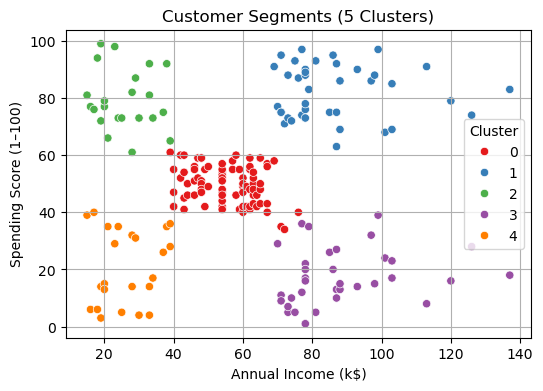

In [64]:
# Here we are plotting the clusters in 2D (Annual Income vs Spending Score).
sns.scatterplot(
    data=df, 
    x="annual_income_k", 
    y="spending_score_1100", 
    hue="cluster", 
    palette="Set1"
)
plt.title("Customer Segments (5 Clusters)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1–100)")
plt.legend(title="Cluster")
plt.show()


In [65]:
# Here we are checking the average age, income, and spending score of each cluster.
cluster_summary = df.groupby("cluster")[["age", "annual_income_k", "spending_score_1100"]].mean().round(1)
cluster_summary


,age,annual_income_k,spending_score_1100
cluster,,,
0,42.7,55.3,49.5
1,32.7,86.5,82.1
2,25.3,25.7,79.4
3,41.1,88.2,17.1
4,45.2,26.3,20.9


In [66]:
# Here we are checking how many customers fall into each cluster.
df["cluster"].value_counts().sort_index()


cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64

In [67]:
# Here we are checking average age, income, and spending score of each cluster again for clarity.
df.groupby("cluster")[["age", "annual_income_k", "spending_score_1100"]].mean().round(1)


,age,annual_income_k,spending_score_1100
cluster,,,
0,42.7,55.3,49.5
1,32.7,86.5,82.1
2,25.3,25.7,79.4
3,41.1,88.2,17.1
4,45.2,26.3,20.9


In [68]:
# Here we are getting the cluster centers (centroids) in original units so they are easy to read.
centroids_scaled = kmeans.cluster_centers_                # centroids in scaled space
centroids = scaler.inverse_transform(centroids_scaled)    # convert back to original units

# Put them in a neat table
centroids_df = pd.DataFrame(centroids, columns=["annual_income_k", "spending_score_1100"])
centroids_df["cluster"] = centroids_df.index
centroids_df[["annual_income_k","spending_score_1100"]] = centroids_df[["annual_income_k","spending_score_1100"]].round(1)

centroids_df


,annual_income_k,spending_score_1100,cluster
0,55.3,49.5,0
1,86.5,82.1,1
2,25.7,79.4,2
3,88.2,17.1,3
4,26.3,20.9,4


In [69]:
# Here we are assigning simple human-friendly names to each cluster.
cluster_names = {
    0: "Premium (High income, High spending)",
    1: "Cautious High Income (High income, Low spending)",
    2: "Young Spenders (Low income, High spending)",
    3: "Budget Conscious (Low income, Low spending)",
    4: "Average (Medium income, Medium spending)"
}

# Create a new column with these segment names
df["segment_name"] = df["cluster"].map(cluster_names)

# Quick peek at first 10 rows
df.head(10)



,customerid,gender,age,annual_income_k,spending_score_1100,cluster,segment_name
0,1,Male,19,15,39,4,"Average (Medium income, Medium spending)"
1,2,Male,21,15,81,2,"Young Spenders (Low income, High spending)"
2,3,Female,20,16,6,4,"Average (Medium income, Medium spending)"
3,4,Female,23,16,77,2,"Young Spenders (Low income, High spending)"
4,5,Female,31,17,40,4,"Average (Medium income, Medium spending)"
5,6,Female,22,17,76,2,"Young Spenders (Low income, High spending)"
6,7,Female,35,18,6,4,"Average (Medium income, Medium spending)"
7,8,Female,23,18,94,2,"Young Spenders (Low income, High spending)"
8,9,Male,64,19,3,4,"Average (Medium income, Medium spending)"
9,10,Female,30,19,72,2,"Young Spenders (Low income, High spending)"


## Cluster-wise Interpretations & Strategies

1. **Premium (High income, High spending)**  
   - These are VIP customers who spend a lot and have high income.  
   - **Strategy:** Focus on loyalty programs, premium offers, and exclusive experiences.  

2. **Cautious High Income (High income, Low spending)**  
   - These customers have money but don’t spend much.  
   - **Strategy:** Encourage them with targeted discounts, personalized offers, and product recommendations.  

3. **Young Spenders (Low income, High spending)**  
   - Mostly younger customers who spend a lot despite lower income.  
   - **Strategy:** Attract them with trendy, affordable items and campaigns on social media.  

4. **Budget Conscious (Low income, Low spending)**  
   - These customers are price-sensitive and spend cautiously.  
   - **Strategy:** Provide discounts, budget-friendly products, and essentials.  

5. **Average (Medium income, Medium spending)**  
   - Balanced customers with moderate income and spending.  
   - **Strategy:** Keep them engaged with seasonal offers and regular promotions.  



## Conclusion

In this project, we used the **Mall Customer dataset** to perform **customer segmentation using K-Means clustering**.  
We explored the dataset, selected relevant features (annual income and spending score), scaled the data, and applied clustering.  
Both the **Elbow Method** and **Silhouette Score** suggested that the optimal number of clusters was **5**.

The analysis revealed **five distinct customer segments**:
- Premium (High income, High spending)  
- Cautious High Income (High income, Low spending)  
- Young Spenders (Low income, High spending)  
- Budget Conscious (Low income, Low spending)  
- Average (Medium income, Medium spending)  

👉 These segments can help businesses design **targeted marketing strategies**, improve customer engagement, and boost overall sales.  
By understanding customer behavior through segmentation, companies can serve their customers more effectively and make better business decisions.

THANK YOU !
